In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
import shap

c:\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
LETTERGRADES = {
    'A+': 4.0,
    'A': 4.0,
    'A-': 3.7,
    'B+': 3.3,
    'B': 3.0,
    'B-': 2.7,
    'C+': 2.3,
    'C': 2.0,
    'C-': 1.7,
    'D+': 1.3,
    'D': 1.0,
    'E': 0,
    'F': 0
}

def get_number_grade(letter_grade: str) -> float:
    return LETTERGRADES[letter_grade]

In [4]:
# missing 201500 201700 201800 201810
#               201510       201520       201600       201610      201620      201710      201720      201820
# academic_periods = [201510, 201520, 201600, 201610, 201620, 201710, 201720, 201820]

feature_imps = []
wave = 1

data = pd.read_csv(f'../../../final_data/activity_sleep_survey_grade/activity_sleep_survey_grade_{wave}.csv')
data = data.loc[data['FinalGrade'].isin(LETTERGRADES.keys())]
train_data = pd.get_dummies(data.drop(['egoid', 'FinalGrade'], axis=1))

train_features, test_features, train_labels, test_labels = train_test_split(train_data, data['FinalGrade'].apply(get_number_grade), test_size = 0.25, random_state = 42)

rf = RandomForestRegressor(n_estimators=100, random_state=33, oob_score=True)
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

print("Wave:", wave)
feature_imp = pd.Series(rf.feature_importances_, index = train_data.columns).sort_values(ascending = True)
feature_imps.append(feature_imp)

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(test_labels, predictions))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(test_labels, predictions))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(test_labels, predictions, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(test_labels, predictions))
print('Explained Variance Score:', metrics.explained_variance_score(test_labels, predictions))
print('Max Error:', metrics.max_error(test_labels, predictions))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(test_labels, predictions))
print('Median Absolute Error:', metrics.median_absolute_error(test_labels, predictions))
print('R^2:', metrics.r2_score(test_labels, predictions))
try:
    print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(test_labels, predictions))
except:
    pass
try:
    print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(test_labels, predictions))
except:
    pass

Wave: 1
Mean Absolute Error (MAE): 0.0003533852435687219
Mean Squared Error (MSE): 5.3127575728800844e-05
Root Mean Squared Error (RMSE): 0.007288866559952984
Mean Absolute Percentage Error (MAPE): 0.00011326006118468451
Explained Variance Score: 0.9997683998237016
Max Error: 0.4829999999999979
Mean Squared Log Error: 3.2886724897547585e-06
Median Absolute Error: 0.0
R^2: 0.9997683984417756
Mean Poisson Deviance: 1.7252857196751355e-05
Mean Gamma Deviance: 5.713493480440171e-06


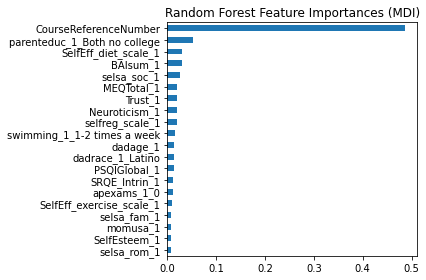

In [5]:

ax = feature_imp[-20:].plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
ax.figure.tight_layout()

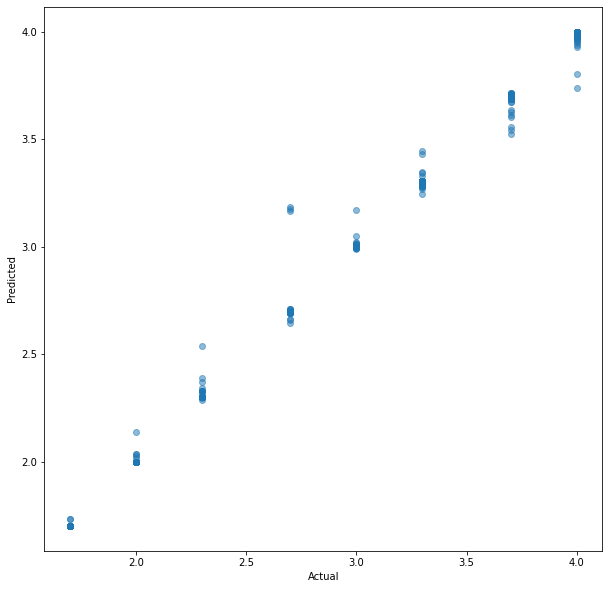

In [6]:

plt.figure(figsize=(10,10))
plt.scatter(test_labels, predictions, alpha=0.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(feature_imp[-20:])
shap.summary_plot(shap_values, feature_imp[-20:], plot_type="bar")
shap.summary_plot(shap_values, feature_imp[-20:])

: 

: 